In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

%matplotlib inline


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-risk-analysis-for-extending-bank-loans/bankloans.csv


In [3]:
df = pd.read_csv("/kaggle/input/credit-risk-analysis-for-extending-bank-loans/bankloans.csv")
df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [4]:
df.isnull().sum()

age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     450
dtype: int64

In [5]:
df.value_counts()

age  ed  employ  address  income  debtinc  creddebt  othdebt   default
56   1   11      20       59      15.0     4.672800  4.177200  0.0        1
20   1   4       0        14      9.7      0.200984  1.157016  1.0        1
     3   0       1        17      2.3      0.043792  0.347208  0.0        1
21   1   1       1        16      6.3      0.141120  0.866880  0.0        1
                          18      17.3     0.158814  2.955186  0.0        1
                                                                         ..
23   1   7       3        22      14.4     0.849024  2.318976  0.0        1
     2   0       1        17      27.7     2.043706  2.665294  1.0        1
                          42      3.9      1.018836  0.619164  1.0        1
                 2        21      11.4     0.775656  1.618344  1.0        1
                 4        21      8.7      0.454923  1.372077  0.0        1
Name: count, Length: 700, dtype: int64

In [6]:
df = df.dropna()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='income'>

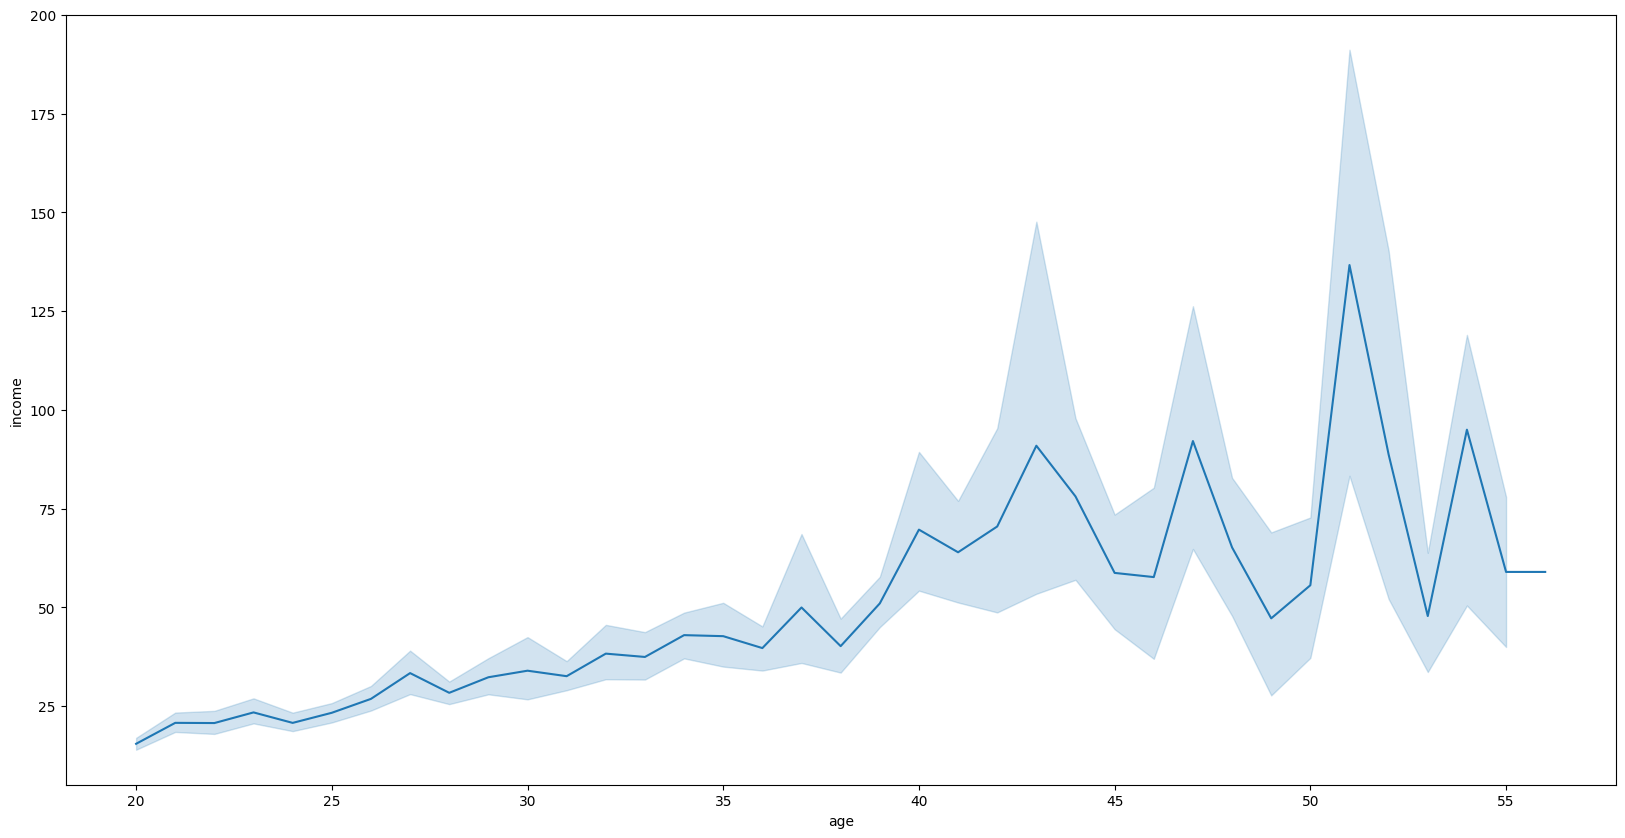

In [8]:
fig,ax = plt.subplots(figsize=(20,10))
sns.lineplot(x='age',y='income',data=df,ax=ax)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='debtinc'>

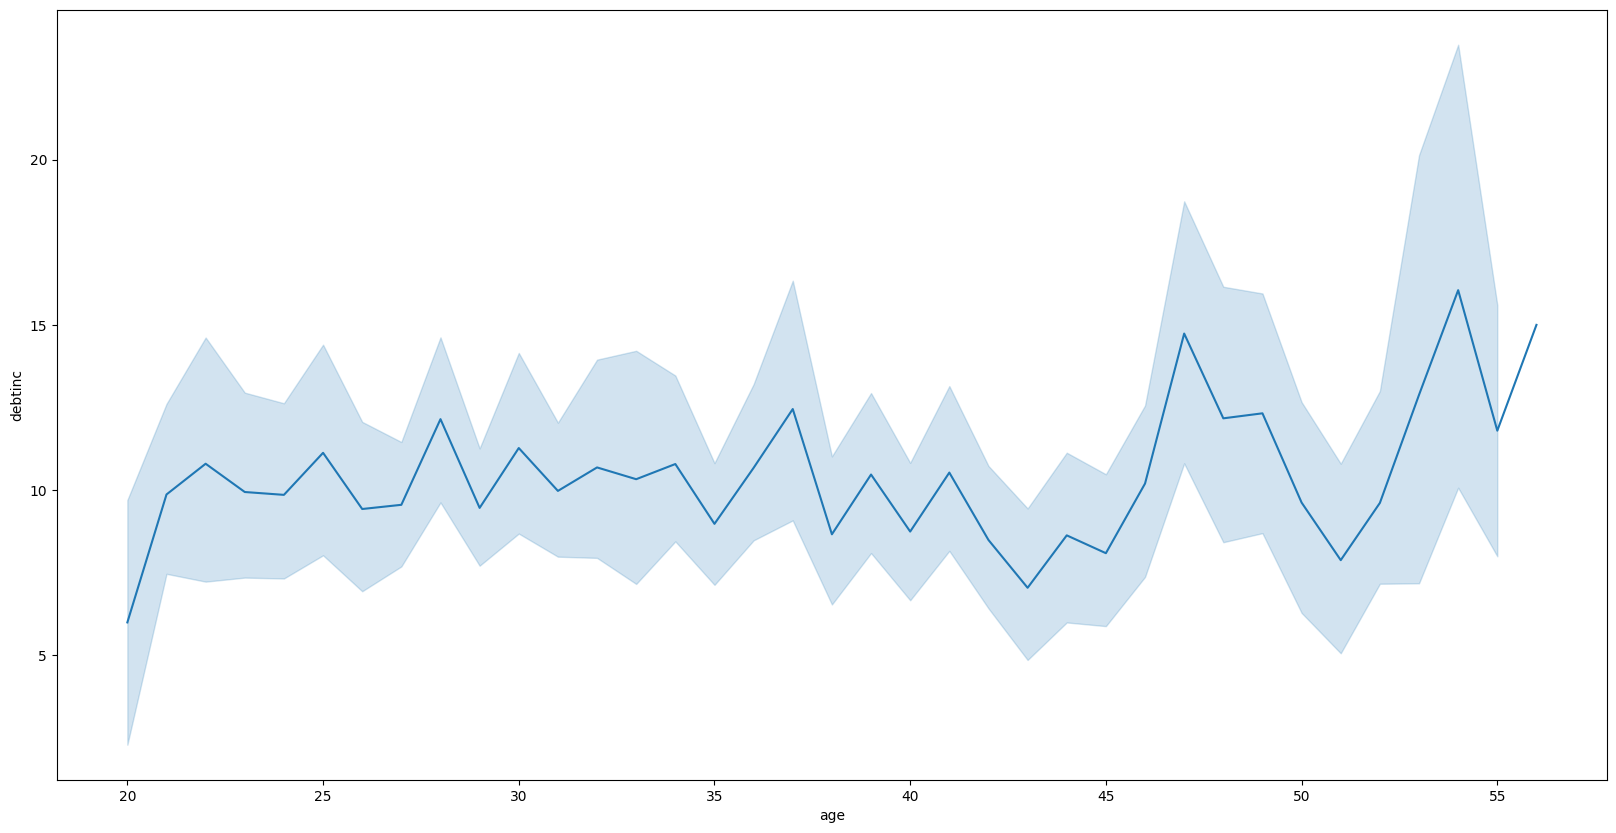

In [10]:
fig,ax = plt.subplots(figsize=(20,10))
sns.lineplot(x='age',y='debtinc',data=df,ax=ax)

In [11]:
df['default'].value_counts()

default
0.0    517
1.0    183
Name: count, dtype: int64

In [12]:
x=df.drop(['default'],axis=1)
y=df['default']

In [13]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)

In [14]:
sc= StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.fit_transform(xtest)

CREATING THE ML MODEL

1.Random Forest



In [16]:
rfc = RandomForestClassifier(n_estimators=200)

In [18]:
rfc.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=200)

In [19]:
rfc.score(xtest,ytest)

0.8142857142857143

In [20]:
rfc2 = cross_val_score(estimator=rfc,X=xtrain,y=ytrain,cv=10)
rfc2.mean()

0.7874999999999999

SVC


In [21]:
sv = SVC()
sv.fit(xtrain,ytrain)

SVC()

In [22]:
sv.score(xtest,ytest)

0.7928571428571428

In [28]:
model = GridSearchCV(sv,{
    'C':[0.1,0.2,0.4,0.8,1.2,1.8,4.0,7.0],
    'gamma':[0.1,0.4,0.8,1.0,0.2,3.0],
    'kernel':['rbf','linear']
},scoring='accuracy',cv=10)

In [29]:
model.fit(xtrain,ytrain)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.2, 0.4, 0.8, 1.2, 1.8, 4.0, 7.0],
                         'gamma': [0.1, 0.4, 0.8, 1.0, 0.2, 3.0],
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy')

In [30]:
model.best_params_

{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}

In [33]:
model2 = SVC(C=0.1,gamma=0.1,kernel='linear')
model2.fit(xtrain,ytrain)
model2.score(xtest,ytest)

0.8214285714285714

In [36]:
lr = LogisticRegression()
lr.fit(xtrain,ytrain)
lr.score(xtest,ytest)

0.8357142857142857

<Axes: >

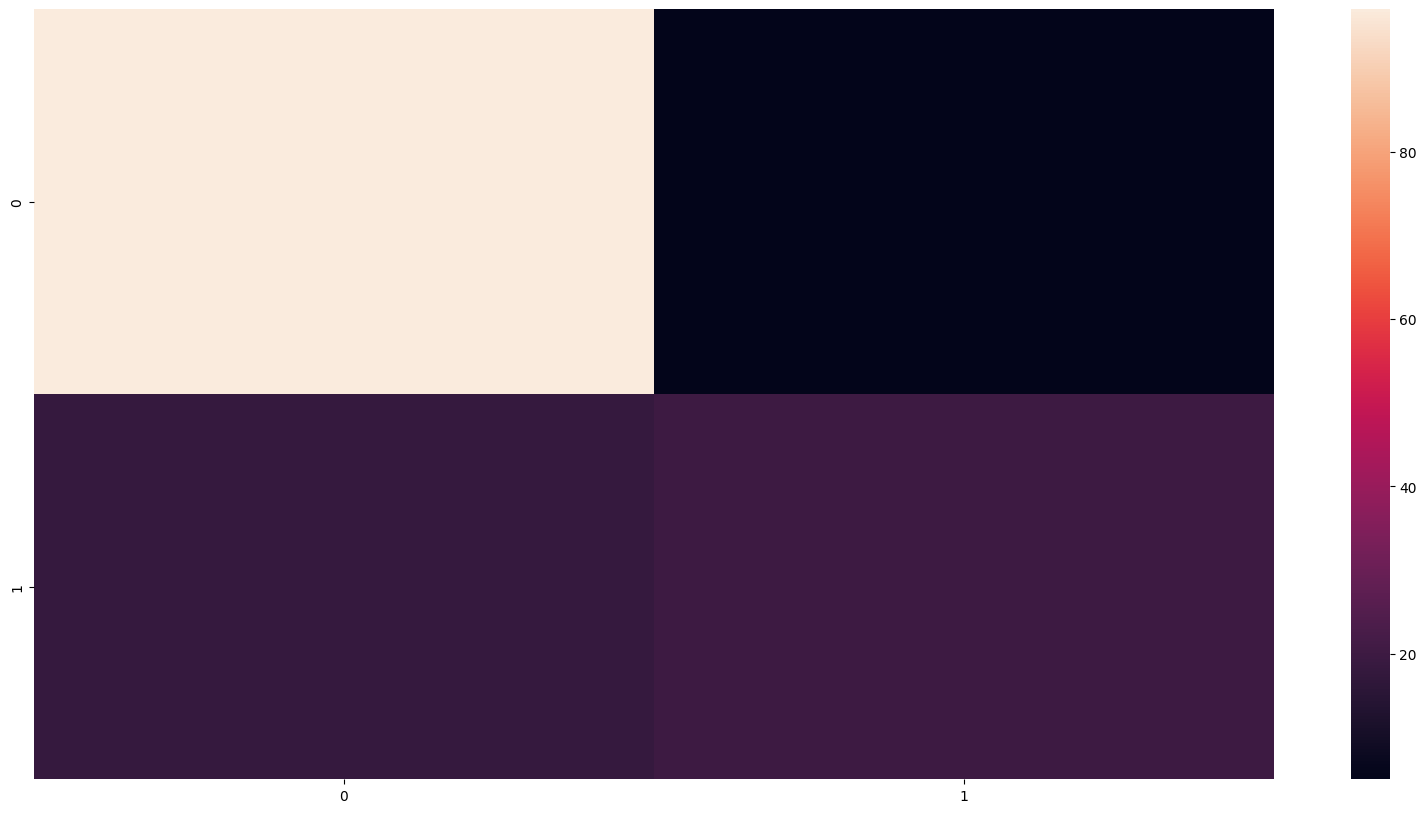

In [37]:
yp = lr.predict(xtest)
c=confusion_matrix(ytest,yp)
fig ,ax = plt.subplots(figsize=(20,10))
sns.heatmap(c,ax=ax)